In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import missingno as msno


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,precision_score
from sklearn.neighbors import KNeighborsClassifier


#### Verinin İçeriği

1. pH değeri: PH, suyun asit-baz dengesini değerlendirmede önemli bir parametredir. Aynı zamanda su durumunun asidik veya alkali durumunun göstergesidir. DSÖ, izin verilen maksimum pH sınırını 6,5 ila 8,5 arasında önermiştir. Mevcut araştırma aralıkları, DSÖ standartları aralığında olan 6,52–6,83 idi. 

2. Sertlik: Sertlik esas olarak kalsiyum ve magnezyum tuzlarından kaynaklanır. Bu tuzlar, suyun içinden geçtiği jeolojik tortulardan çözülür. Suyun sertlik oluşturan malzeme ile temas halinde olduğu süre, ham suda ne kadar sertlik olduğunu belirlemeye yardımcı olur. Sertlik başlangıçta suyun Kalsiyum ve Magnezyumun neden olduğu sabunu çökeltme kapasitesi olarak tanımlanıyordu. 

3. Katılar (Toplam çözünmüş katılar - TDS):
Su, çok çeşitli inorganik ve bazı organik mineralleri veya potasyum, kalsiyum, sodyum, bikarbonatlar, klorürler, magnezyum, sülfatlar vb. Bu, su kullanımı için önemli bir parametredir. TDS değeri yüksek olan su, suyun yüksek oranda mineralize olduğunu gösterir. TDS için arzu edilen limit 500 mg/l ve maksimum limit 1000 mg/l olup içme amaçlı reçete edilmiştir.

4. Kloraminler:
Klor ve kloramin, kamusal su sistemlerinde kullanılan başlıca dezenfektanlardır. Kloraminler en yaygın olarak içme suyunu arıtmak için klora amonyak eklendiğinde oluşur. İçme suyunda litre başına 4 miligrama (mg/L veya milyonda 4 parça (ppm)) kadar klor seviyeleri güvenli kabul edilir.

5. Sülfat:
Sülfatlar, minerallerde, toprakta ve kayalarda bulunan doğal olarak oluşan maddelerdir. Ortam havasında, yeraltı sularında, bitkilerde ve yiyeceklerde bulunurlar. Sülfatın başlıca ticari kullanımı kimya endüstrisindedir. Deniz suyundaki sülfat konsantrasyonu litre başına yaklaşık 2.700 miligramdır (mg/L). Bazı coğrafi bölgelerde çok daha yüksek konsantrasyonlar (1000 mg/L) bulunmasına rağmen, çoğu tatlı su kaynağında 3 ila 30 mg/L arasında değişmektedir.

6. İletkenlik:
Saf su, elektrik akımını iyi bir şekilde iletmez, aksine iyi bir yalıtkandır. İyon konsantrasyonundaki artış, suyun elektriksel iletkenliğini arttırır. Genel olarak, suda çözünmüş katıların miktarı elektriksel iletkenliği belirler. Elektriksel iletkenlik (EC), aslında bir çözeltinin akım iletmesini sağlayan iyonik sürecini ölçer. WHO standartlarına göre EC değeri 400 μS/cm'yi geçmemelidir.

7. Organik_karbon:
Kaynak sularındaki Toplam Organik Karbon (TOC), sentetik kaynakların yanı sıra çürüyen doğal organik maddelerden (NOM) gelir. TOC, saf sudaki organik bileşiklerdeki toplam karbon miktarının bir ölçüsüdür. US EPA'ya göre TOC olarak arıtılmış / içme suyunda < 2 mg/L ve arıtma için kullanılan kaynak suda < 4 mg/Lit.


8. Trihalometanlar:
THM'ler, klor ile işlenmiş suda bulunabilen kimyasallardır. İçme suyundaki THM'lerin konsantrasyonu, sudaki organik madde seviyesine, suyu arıtmak için gereken klor miktarına ve arıtılan suyun sıcaklığına göre değişir. 80 ppm'e kadar THM seviyeleri içme suyunda güvenli kabul edilir.

9. Bulanıklık:
Suyun bulanıklığı, askıda halde bulunan katı madde miktarına bağlıdır. Suyun ışık yayma özelliklerinin bir ölçüsüdür ve test koloidal maddeye göre atık deşarj kalitesini belirtmek için kullanılır. Wondo Genet Campus için elde edilen ortalama bulanıklık değeri (0,98 NTU), DSÖ tarafından tavsiye edilen 5,00 NTU değerinden düşüktür.

10. İçilebilirlik:
Suyun insan tüketimi için güvenli olup olmadığını gösterir; 1, İçilebilir anlamına gelir ve 0, İçilemez anlamına gelir.

In [6]:
df=pd.read_csv("water_potability.csv")

In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

#### Bağımlı Değişken Analizi 

In [19]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

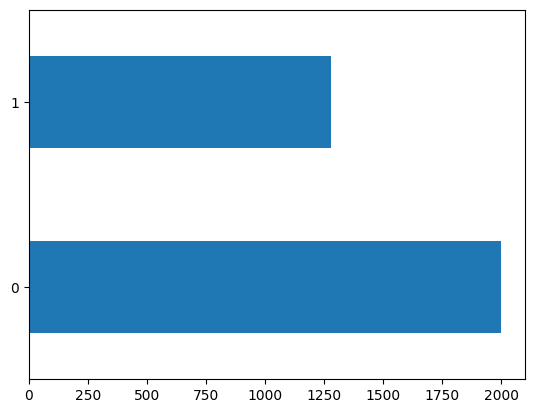

In [20]:
df["Potability"].value_counts().plot.barh();

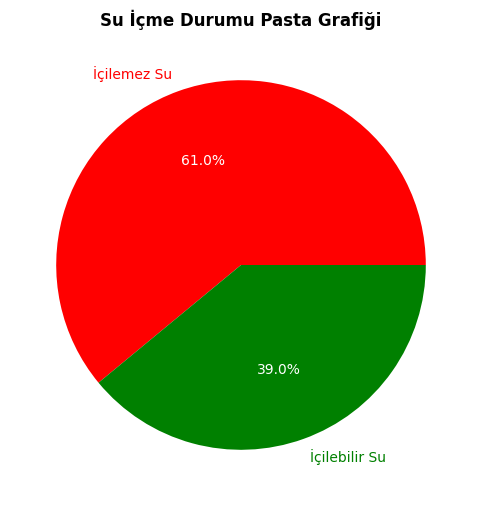

In [26]:
plt.figure(figsize=(6, 6))
labels = 'İçilemez Su', 'İçilebilir Su'
patches, texts, autotexts = plt.pie(df["Potability"].value_counts(), colors=['red', 'green'], autopct='%.1f%%', radius=1, labels=['İçilemez Su', 'İçilebilir Su'], )
texts[0].set_color('red')
texts[1].set_color('green')
[autotext.set_color('white') for autotext in autotexts]
plt.title('Su İçme Durumu Pasta Grafiği', color ='black', weight= 'bold')
plt.show()

#### Özellikler Arasındaki İlişki 

In [27]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


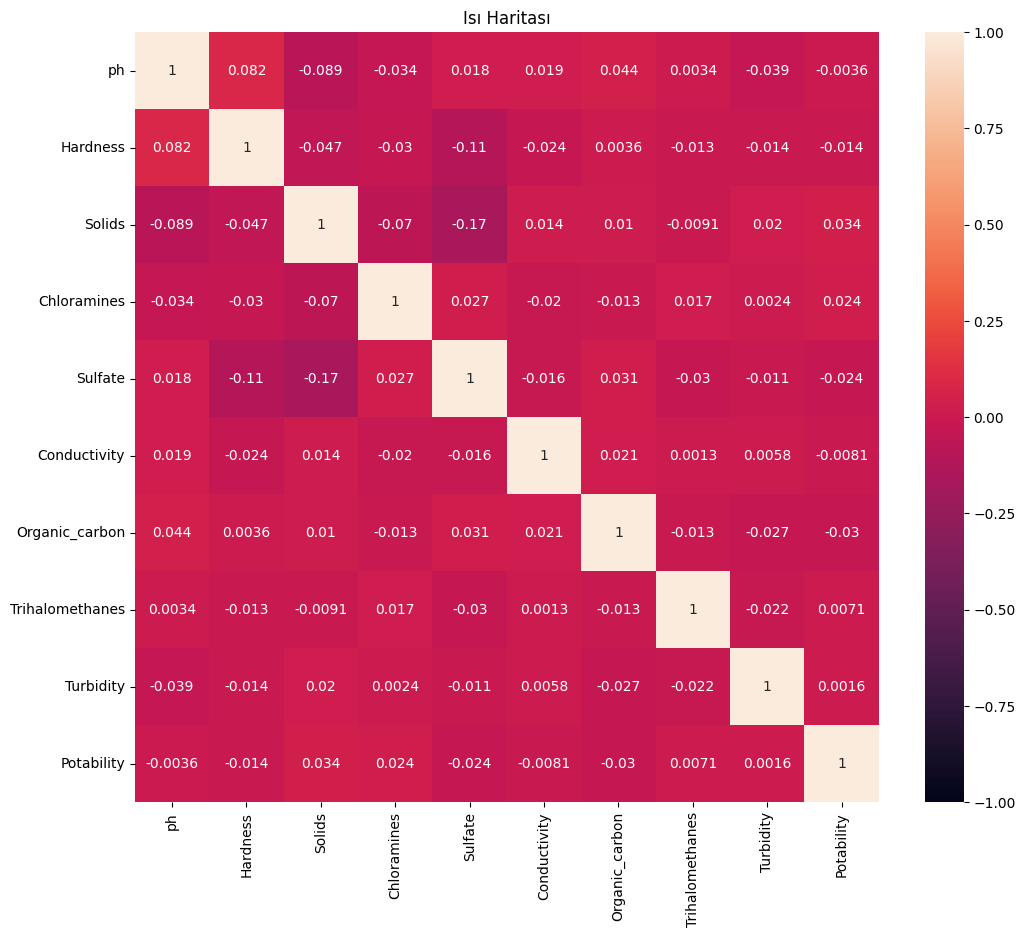

In [38]:
korelasyon = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(korelasyon, annot=True, vmin=-1.0)     
plt.title("Isı Haritası")
plt.show()
     

#### Önişleme: Eksik Veri Sorunu

In [39]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

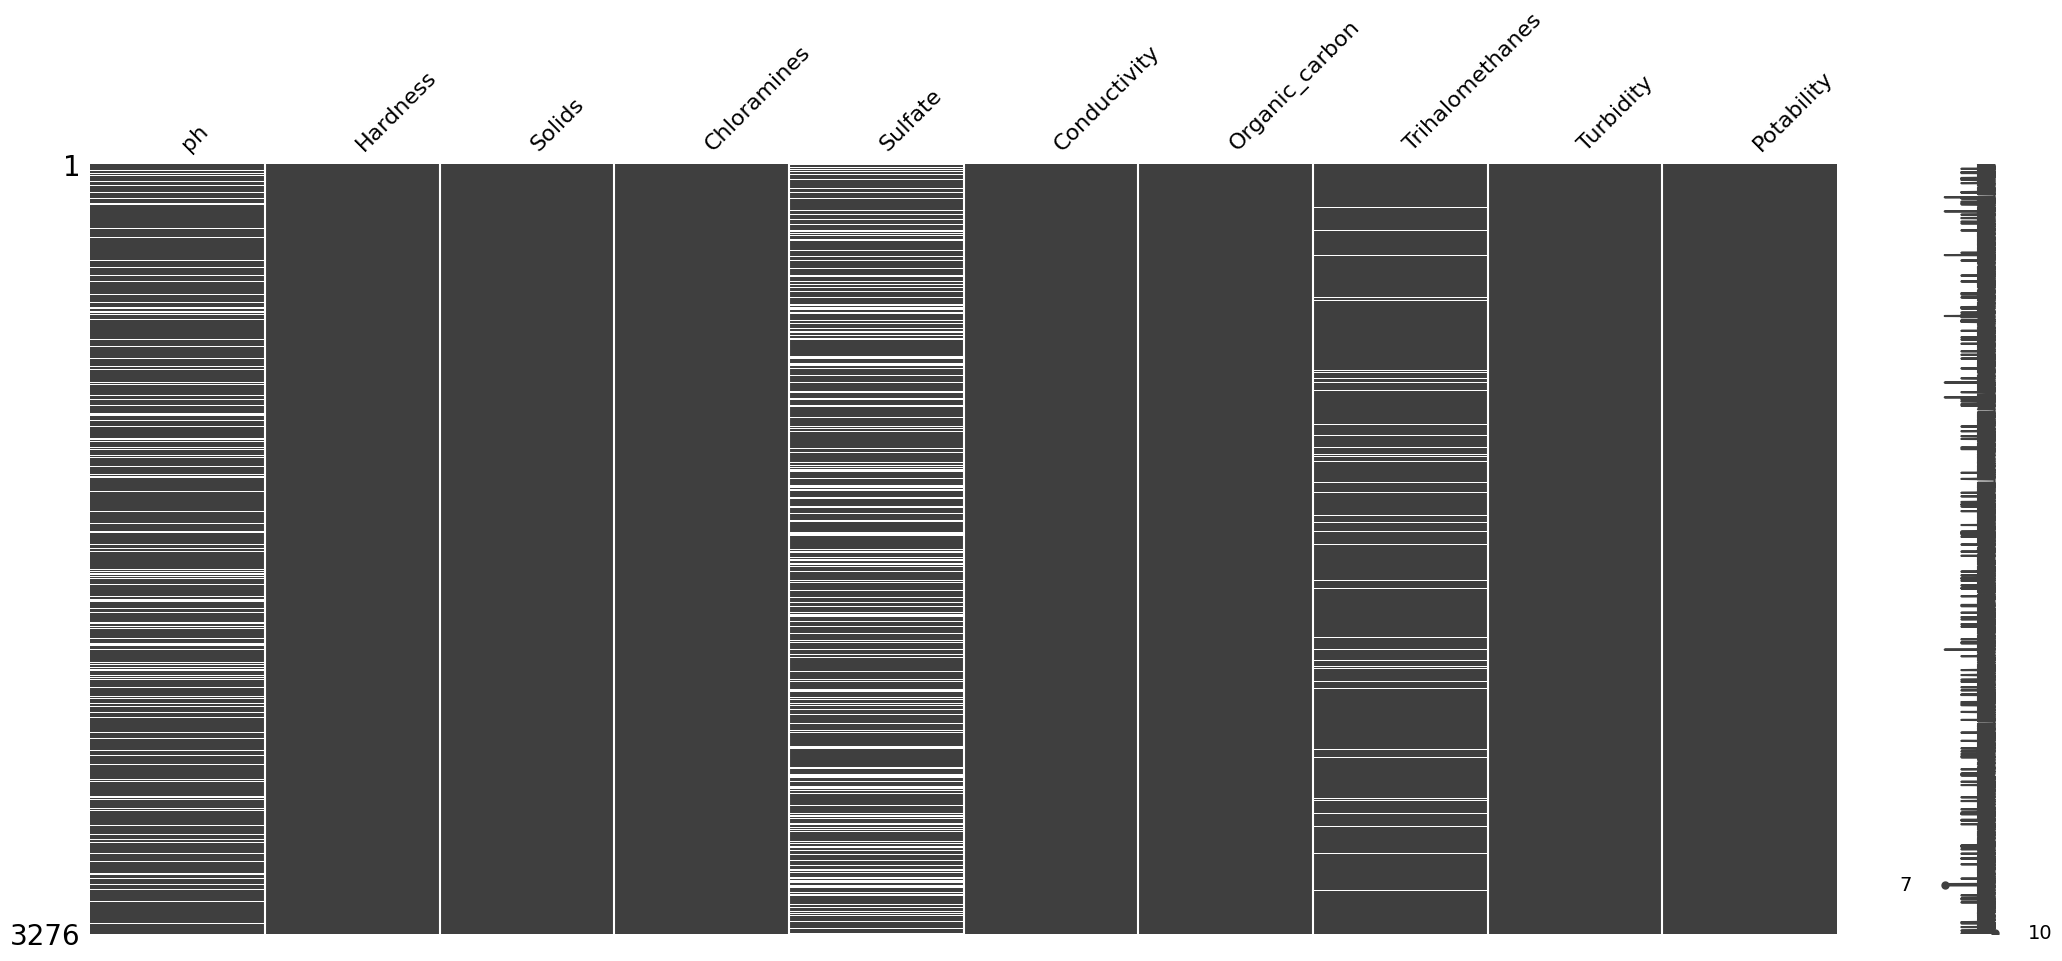

In [43]:
msno.matrix(df)
plt.show()

In [46]:
df["ph"].fillna(value=df["ph"].mean(),inplace=True) ## eksik ph değerlerini ortalam ile doldurduk 

In [48]:
df["Sulfate"].fillna(value=df["Sulfate"].mean(),inplace=True) ## eksik Sulfate değerlerini ortalam ile doldurduk 

In [52]:
df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].mean(),inplace=True) ## eksik Trihalomethanes değerlerini ortalam ile doldurduk 

In [53]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [54]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Ön İşleme: Eğitim-Test Veri Seti Bölmesi ve Normalleştirme

In [55]:
X=df.drop("Potability",axis=1) 

In [56]:
y=df["Potability"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [58]:
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)

(983, 9)
(983,)
(2293, 9)
(2293,)


In [60]:
## min max normalizasyonu
X_train_max=np.max(X_train)
X_train_min=np.min(X_test)
X_train=(X_train-X_train_min)/(X_train_max-X_train_min)
X_test=(X_test-X_train_min)/(X_train_max-X_train_min)

## Modelleme: KNN & Random Forest 

#### Random Forest

In [100]:
rf_model = RandomForestClassifier()

In [101]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [102]:
rf_model

RandomForestClassifier()

In [103]:
y_pred = rf_model.predict(X_test)

In [104]:
print("Random Forest Doğruluk Skoru:" + " "  +  "%" + str(round(100* accuracy_score(y_test, y_pred),2)))

Random Forest Doğruluk Skoru: %64.7


##### KNN

In [96]:
knn_model = KNeighborsClassifier()

In [97]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [98]:
y_pred = knn_model.predict(X_test)

In [99]:
print("Random Forest Doğruluk Skoru:" + " "  +  "%" + str(round(100* accuracy_score(y_test, y_pred),2)))

Random Forest Doğruluk Skoru: %61.75


## Model Tunning 

#### Random Forest

In [83]:
rf_params = {"max_depth": [2,5,8,10], 
            "max_features": [2,5,8], 
            "n_estimators": [10,500,1000], 
            "min_samples_split": [2,5,10]}

In [84]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1)

In [88]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]})

In [89]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 500}


In [90]:
rf_tuned = RandomForestClassifier(max_depth = 10, 
                                  max_features = 5, 
                                  min_samples_split = 5,
                                  n_estimators = 500)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_split=5,
                       n_estimators=500)

In [105]:
y_pred = rf_tuned.predict(X_test)

In [106]:
print("Random Forest Doğruluk Skoru:" + " "  +  "%" + str(round(100* accuracy_score(y_test, y_pred),2)))

Random Forest Doğruluk Skoru: %66.53


In [107]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

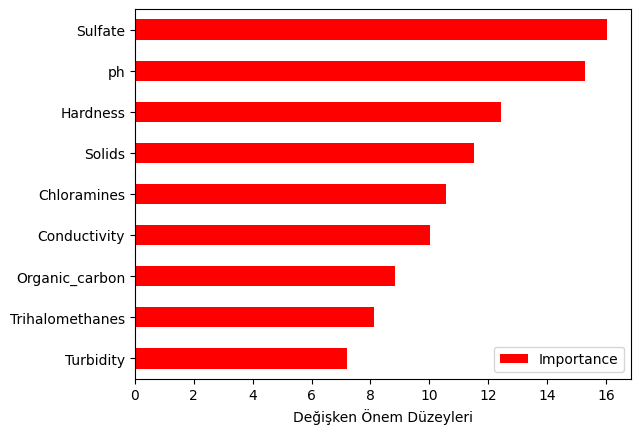

In [108]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

#### KNN

In [109]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [110]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [111]:
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi parametreler: {'n_neighbors': 43}


In [113]:
knn = KNeighborsClassifier(43)
knn_tuned = knn.fit(X_train, y_train)

In [116]:
y_pred = knn_tuned.predict(X_test)

In [117]:
print("KNN Doğruluk Skoru:" + " "  +  "%" + str(round(100* accuracy_score(y_test, y_pred),2)))

KNN Doğruluk Skoru: %64.8
